# Scraping top Repos from Github


 ### Pick a website and describe your objective
- Browse through different sites and pick on to scrape. Check the "Project Ideas" section for inspiration.- 
Identify the information you'd like to scrape from the site. Decide the format of the output CSV file
- .
Summarize your project idea and outline your strategy in a Juptyer notebook. Use the "New" button abov
e.e.

###  Project outline
- use Python, Requests, Beautiful Soup, Panadas, Numpy
- scrape github topics url 'https://github.com/topics'
- list of topics and for each topic : rirle, topic url and topic desc
    - for each topic : get top 20 repositories
        - for each repository : repo name, username, stars, repo url
- for each topic create a separate CSV

## 1. Use the requests library to download web pages



In [8]:
!pip install requests

In [9]:
!pip install requests --upgrade 

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [1]:
import requests

In [12]:
topics_url = "https://github.com/topics"

In [13]:
response= requests.get(topics_url)

In [14]:
reponse.status_code

200

In [15]:
len(response.text)

202419

In [16]:
page_content = response.text

In [17]:
page_content[:1000]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-efd2f2257c96.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-6b1e37da2254.css" /><link data-color-theme="dark_dimmed" crossorig

In [19]:
with open('webpage.html', 'w', encoding='utf-8') as f:
    f.write(page_content)


## Use Beautiful Soup to parse and extract information

In [20]:
!pip install beautifulsoup4 --upgrade --quiet

In [22]:
from bs4 import BeautifulSoup

In [24]:
doc = BeautifulSoup(page_content, 'html.parser')

In [23]:
type(doc)

NameError: name 'doc' is not defined

In [26]:
type(doc)

bs4.BeautifulSoup

In [37]:
topic_title_tags=doc.find_all('p',{"class":"f3 lh-condensed mb-0 mt-1 Link--primary"})

In [38]:
len(pt)

30

In [39]:
pt[:20]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Angular</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ansible</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">API</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Arduino</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">ASP.NET</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Awesome Lists</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amazon Web Services</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Azure</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Babel</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Bash</p>,
 <p class="f3 lh-condensed m

In [41]:
topic_title_tags=doc.find_all('p',{"class":"f3 lh-condensed mb-0 mt-1 Link--primary"})
desc_selector = "f5 color-fg-muted mb-0 mt-1"
topic_desc_tags = doc.find_all('p',{'class':desc_selector})


In [44]:
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [51]:
#gettting url
topic_title_tags[0].parent

<a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>

In [54]:

topic_link_tags = doc.find_all('a',{'class':'no-underline flex-grow-0'})

In [55]:
len(topic_link_tags)

30

In [60]:

topic0_url = "https://github.com" + topic_link_tags[0]['href']
print(topic0_url)


https://github.com/topics/3d


In [73]:



topic_titles = [ ]
#to get list of topics
for tag in topic_title_tags:
    topic_titles.append(tag.text)






In [61]:
topic_descs = [ ]
for tag in topic_desc_tags:
    topic_descs.append(tag.text.strip())
topic_descs[:5]



['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

In [223]:
topic_url = [ ]
for tag in topic_link_tags:
    topic_url.append('https://github.com' + tag['href'])

In [224]:
topic_url

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compiler',
 'https://github.com/topics/co

In [ ]:
#getting list of topics is done

In [66]:
#use pandas for  csv file

In [67]:
!pip install pandas --quiet

In [68]:
 import pandas as pd

In [ ]:
topics_df = pd.dataframe

In [74]:
topics_dict = {
    'title' : topic_titles,
    'description' : topic_descs,
    'url' : topic_url

}

In [76]:
topic_df = pd.DataFrame(topics_dict) 

In [80]:
topic_df

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


## Create CSV file(s) with the extracted information

In [85]:
topic_df.to_csv('topics.csv',index=None )

 ## Get information out of topic page

In [86]:
topic1 = topic_url[0]

In [87]:
topic1

'https://github.com/topics/3d'

In [89]:
response = requests.get(topic1)

In [91]:
response.status_code

200

In [92]:
len(response.text)

522109

In [93]:
topic1_doc=BeautifulSoup(response.text, 'html.parser')

In [100]:
repo_tags = topic1_doc.find_all('h3', {'class' : 'f3 color-fg-muted text-normal lh-condensed'}
                                   )

In [101]:
len(repo_tags)

20

In [103]:
a_tags_rep1 = repo_tags[0].find_all('a')

In [106]:
a_tags_rep1  #first tag username(+url for user), second tag containing repository name(+url for repository)

[<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>,
 <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href="/mrdoob/three.js">
             three.js
 </a>]

In [108]:
a_tags_rep1[0].text.strip()

'mrdoob'

In [109]:
a_tags_rep1[1].text.strip()

'three.js'

In [112]:
# for rep url
base_url = 'https://github.com'
a_tags_rep1_url = base_url + a_tags_rep1[1]['href']
a_tags_rep1_url

'https://github.com/mrdoob/three.js'

In [199]:
# for stars
star_tags = topic1_doc.find_all('span', {'class' : 'Counter js-social-count'})
len(star_tags)

20

In [225]:
topic_url

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compiler',
 'https://github.com/topics/co

In [201]:
def parse_star_count(stars_str):
    stars_str =  stars_str.strip()
    if stars_str[-1] == 'k' :
        return int(float(stars_str[:-1]) *1000)
    #if no k
    return int(stars_str)

        

In [142]:
parse_star_count(star_tags[0].text)

101000

In [143]:
rel_tag_all = topic1_doc.find_all('div', {'class':'d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2'})

In [159]:
rel_tag_all = topic1_doc.find_all('div', {'class':'d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2'})
rel_tag =  rel_tag_all[0].find_all('a')
rel_tag

[<a class="topic-tag topic-tag-link Link f6 mb-2" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"TOPIC","click_visual_representation":"TOPIC_TAG","actor_id":null,"record_id":40,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c210e1d6c04712f25ce2ff1cf73cc382178d551beb6e00535c440e4b0f8eaa2f" data-view-component="true" href="/topics/javascript" title="Topic: javascript">
             javascript
 </a>,
 <a class="topic-tag topic-tag-link Link f6 mb-2" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"TOPIC","click_visual_representation":"TOPIC_TAG","actor_id":null,"record_id":123,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="7f6959e42df84521252b169278d540e3b07ea9c9c47b82ed045f017e8e76149e" data-view-component="true" href="/topics/svg" title="Topic: svg">
             svg
 </a>,
 <a clas

In [170]:
 def get_related_tags(rel_tag):
     related_tags = [ ]
     for tag in rel_tag:
         related_tags.append(tag.text.strip())
     return ' '.join(related_tags)                            
 
             
get_related_tags( rel_tag)

'javascript svg webgl html5 canvas augmented-reality webaudio virtual-reality webgl2 3d webgpu webxr'

In [ ]:
# for all above, define functions now so we ca parse all repositories for all pages

In [203]:
star_tags[0].text

'101k'

In [206]:
#gives all info about a repository
def get_repo_info(h3_tag, star_tags , relat_tag):
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tags.text)
    related_tags = get_related_tags( relat_tag)
    return username, repo_name, stars, related_tags, repo_url
    

In [208]:
get_repo_info(repo_tags[1], star_tags[1] , rel_tag_all[1])

('pmndrs',
 'react-three-fiber',
 26900,
 ' react  threejs  animation  renderer  fiber  3d ',
 'https://github.com/pmndrs/react-three-fiber')

In [210]:
topic_repos_dict = {
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'related tags' : [],
    'repo_url' : []
}



for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i] , rel_tag_all[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2])
    topic_repos_dict['related tags'].append(repo_info[3]),
    topic_repos_dict['repo_url'].append(repo_info[4])

In [211]:
topic_repos_dict

{'username': ['mrdoob',
  'pmndrs',
  'libgdx',
  'BabylonJS',
  'ssloy',
  'FreeCAD',
  'lettier',
  'aframevr',
  'CesiumGS',
  'blender',
  'MonoGame',
  'isl-org',
  'mapbox',
  'metafizzy',
  'timzhang642',
  'nerfstudio-project',
  '4ian',
  'a1studmuffin',
  'FyroxEngine',
  'domlysz'],
 'repo_name': ['three.js',
  'react-three-fiber',
  'libgdx',
  'Babylon.js',
  'tinyrenderer',
  'FreeCAD',
  '3d-game-shaders-for-beginners',
  'aframe',
  'cesium',
  'blender',
  'MonoGame',
  'Open3D',
  'mapbox-gl-js',
  'zdog',
  '3D-Machine-Learning',
  'nerfstudio',
  'GDevelop',
  'SpaceshipGenerator',
  'Fyrox',
  'BlenderGIS'],
 'stars': [101000,
  26900,
  23100,
  22900,
  20100,
  18600,
  17600,
  16500,
  12600,
  12500,
  11200,
  11000,
  11000,
  10300,
  9600,
  9100,
  8600,
  7600,
  7600,
  7600],
 'related tags': [' javascript  svg  webgl  html5  canvas  augmented-reality  webaudio  virtual-reality  webgl2  3d  webgpu  webxr ',
  ' react  threejs  animation  renderer  fib

In [213]:
topic_repos_df= pd.DataFrame(topic_repos_dict)

In [214]:
topic_repos_df

,username,repo_name,stars,related tags,repo_url
0,mrdoob,three.js,101000,javascript svg webgl html5 canvas augmen...,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,26900,react threejs animation renderer fiber 3d,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,23100,android game java windows linux ios gam...,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,22900,webgl typescript game-engine webvr game-d...,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,20100,learning c-plus-plus fun tutorial opengl ...,https://github.com/ssloy/tinyrenderer
5,FreeCAD,FreeCAD,18600,windows linux engineering architecture ca...,https://github.com/FreeCAD/FreeCAD
6,lettier,3d-game-shaders-for-beginners,17600,gamedev webgl opengl unity shaders graph...,https://github.com/lettier/3d-game-shaders-for...
7,aframevr,aframe,16500,html gamedev webgl threejs game-engine a...,https://github.com/aframevr/aframe
8,CesiumGS,cesium,12600,webgl geospatial gis cesium czml gltf 3...,https://github.com/CesiumGS/cesium
9,blender,blender,12500,animation rendering computer-graphics mode...,https://github.com/blender/blender


In [215]:
#now we just did this for first topic, we have 19 more topics to go each having 20 repositories

# final code

## code for getting info from each repository

In [379]:
import os
def get_topic_page(topic_url):
    # Download page
    response = requests.get(topic_url)
    # Check status code
    if response.status_code !=200:
        raise Exception('failed to load page{}'.format(topic_url))
    # Parse using beautifulsoup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

#gives all info about a repository
def get_repo_info(h3_tag, star_tags , relat_tag):
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tags.text)
    related_tags = get_related_tags( relat_tag)
    return username, repo_name, stars, related_tags, repo_url

def get_topic_repos(topic_doc):
    # For repo title, repo URL and username
    repo_tags = topic_doc.find_all('h3', {'class' : 'f3 color-fg-muted text-normal lh-condensed'})
    # For stars
    star_tags = topic_doc.find_all('span', {'class' : 'Counter js-social-count'})
    # For related tags 
    rel_tag_all = topic_doc.find_all('div', {'class':'d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2'})
    # rel_tag =  rel_tag_all[0].find_all('a'

    topic_repos_dict = {
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'related tags' : [],
    'repo_url' : []
}
    #get repo info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i] , rel_tag_all[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['related tags'].append(repo_info[3]),
        topic_repos_dict['repo_url'].append(repo_info[4])



    return pd.DataFrame( topic_repos_dict )


def scrape_topic(topic_url,path):
    # for this topic, this function will create a df to csv
    if os.path.exists(path):
        print('The file {} already exists. Skipping...'.format(path))
        return 
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index= None)
     

# write a single function  to:
    1. get the list of topics from topic page
    2. get the list of top repos from each topic page
    3. create a csv for each topic's top repos

## code to get info for each topic 

In [380]:

# returns list of topic titles(github/topics)
def get_topic_titles(doc):
    topic_title_tags = doc.find_all('p',{"class":"f3 lh-condensed mb-0 mt-1 Link--primary"})
    topic_titles = [ ]
    #to get list of topics
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

#returns list of topic description(github/desc)
def get_topic_descs(doc):
    desc_selector = "f5 color-fg-muted mb-0 mt-1"   
    topic_desc_tags = doc.find_all('p',{'class':desc_selector})
    topic_descs = [ ]
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a',{'class':'no-underline flex-grow-0'})
    topic_urls = [ ]
    for tag in topic_link_tags:
        topic_urls.append('https://github.com' + tag['href'])
    return topic_urls


def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
     # Check status code
    if response.status_code !=200:
        raise Exception('failed to load page{}'.format(topic_url))
    # Create a topic dict 
    topics_dict = {
        'title' : get_topic_titles(doc),
        'desc': get_topic_descs(doc),
        'url' : get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)




In [382]:
# Scrape repos for each topic now
def scrape_topics_repos():
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('scraping top repositories for "{}"  '.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title'])  )      

In [383]:
scrape_topics_repos()

scraping top repositories for "3D"  
scraping top repositories for "Ajax"  
scraping top repositories for "Algorithm"  
scraping top repositories for "Amp"  
scraping top repositories for "Android"  
scraping top repositories for "Angular"  
scraping top repositories for "Ansible"  
scraping top repositories for "API"  
scraping top repositories for "Arduino"  
scraping top repositories for "ASP.NET"  
scraping top repositories for "Awesome Lists"  
scraping top repositories for "Amazon Web Services"  
scraping top repositories for "Azure"  
scraping top repositories for "Babel"  
scraping top repositories for "Bash"  
scraping top repositories for "Bitcoin"  
scraping top repositories for "Bootstrap"  
scraping top repositories for "Bot"  
scraping top repositories for "C"  
scraping top repositories for "Chrome"  
scraping top repositories for "Chrome extension"  
scraping top repositories for "Command-line interface"  
scraping top repositories for "Clojure"  
scraping top repositor

## Identify which tags are associated with the most stars overall
- calculate the total number of stars associated with each tag across all repositories and then sorts the tags by their popularity (total stars)
- or simply calculate and sort tags by their total stars across repositories



In [400]:
import numpy as np
import pandas as pd
import os

def load_and_split_tags(file_path):
    df = pd.read_csv(file_path)
    stars = df['stars'].values  # Convert the stars column to a NumPy array
    tags = df['related tags'].apply(lambda x: x.split())  # Split tags by spaces
    repo_urls = df['repo_url'].values  # Get the repository URLs
    return tags, stars, repo_urls

def tag_based_analysis(directory):
    tag_dict = {}

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            print(f"Processing file: {filename}")
            
            tags, stars, repo_urls = load_and_split_tags(file_path)
            
            for i, tag_list in enumerate(tags):
                for tag in tag_list:
                    tag = tag.strip()
                    if tag not in tag_dict:
                        tag_dict[tag] = {'total_stars': 0, 'repo_urls': []}
                    tag_dict[tag]['total_stars'] += stars[i]
                    tag_dict[tag]['repo_urls'].append(repo_urls[i])
    
    return tag_dict

def get_top_100_tags(tag_dict):
    # Convert the dictionary to a list of tuples and sort by total stars
    sorted_tags = sorted(tag_dict.items(), key=lambda item: item[1]['total_stars'], reverse=True)
    
    # Select the top 100 tags
    top_100_tags = sorted_tags[:100]
    
    # Prepare the final DataFrame
    top_tags_data = []
    
    for tag, data in top_100_tags:
        # Join all repo URLs into a single string, separated by commas
        repo_urls_combined = ", ".join(data['repo_urls'])
        top_tags_data.append({
            'Tag Name': tag,
            'Stars': data['total_stars'],
            'Repo URLs': repo_urls_combined
        })
    
    top_tags_df = pd.DataFrame(top_tags_data)
    
    return top_tags_df

# Example usage
directory = 'data'  # Your directory with CSV files
tag_dict = tag_based_analysis(directory)
top_tags_df = get_top_100_tags(tag_dict)

# Save the results to a CSV file
top_tags_df.to_csv('top_100_tags_repos.csv', index=False)

# Display the DataFrame
print(top_tags_df)


Processing file: 3D.csv
Processing file: Ajax.csv
Processing file: Algorithm.csv
Processing file: Amazon Web Services.csv
Processing file: Amp.csv
Processing file: Android.csv
Processing file: Angular.csv
Processing file: Ansible.csv
Processing file: API.csv
Processing file: Arduino.csv
Processing file: ASP.NET.csv
Processing file: Awesome Lists.csv
Processing file: Azure.csv
Processing file: Babel.csv
Processing file: Bash.csv
Processing file: Bitcoin.csv
Processing file: Bootstrap.csv
Processing file: Bot.csv
Processing file: C++.csv
Processing file: C.csv
Processing file: Chrome extension.csv
Processing file: Chrome.csv
Processing file: Clojure.csv
Processing file: Code quality.csv
Processing file: Code review.csv
Processing file: Command-line interface.csv
Processing file: Compiler.csv
Processing file: Continuous integration.csv
Processing file: Cryptocurrency.csv
Processing file: Crystal.csv
                  Tag Name    Stars  \
0               javascript  3326084   
1           

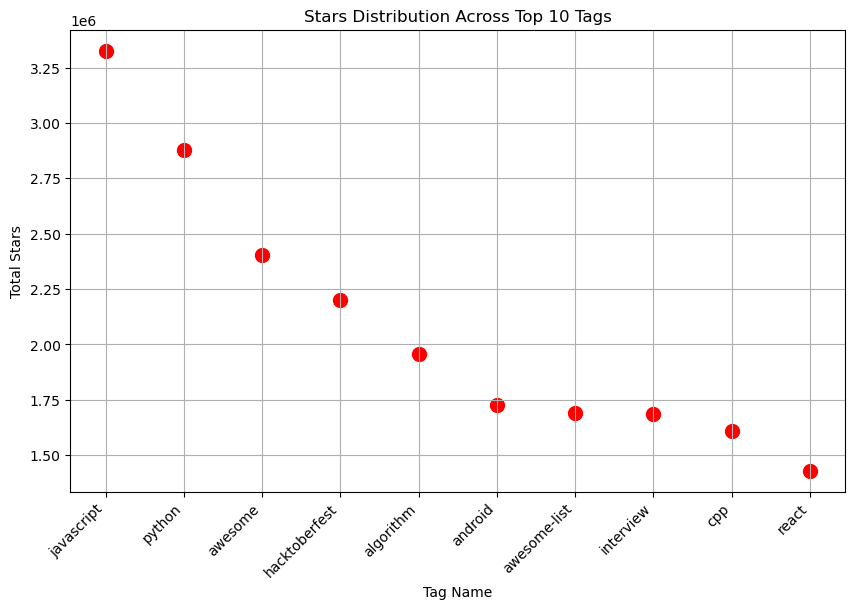

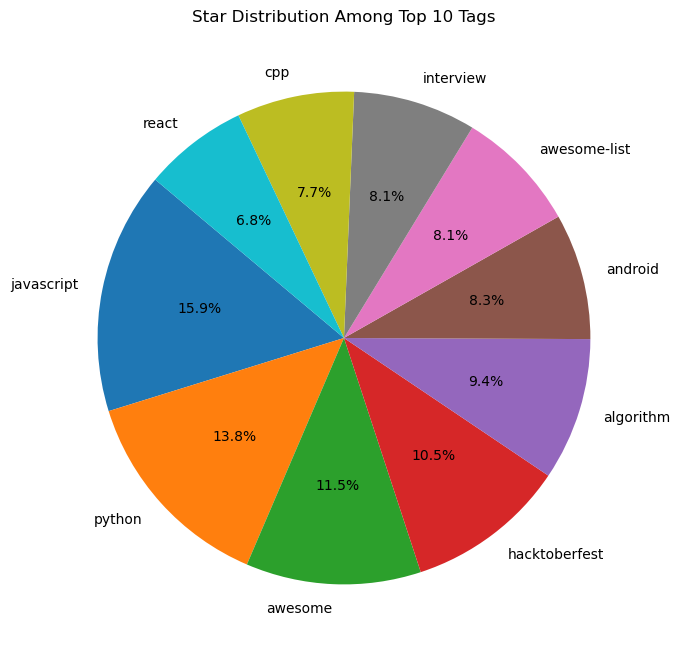

In [402]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
top_tags_df = pd.read_csv('top_100_tags_repos.csv')

# Sort by stars and select the top 10 tags for visualization
top_10_tags_df = top_tags_df.sort_values(by='Stars', ascending=False).head(10)

# Scatter Plot: Relationship between the number of stars and the number of repositories using each tag
plt.figure(figsize=(10, 6))
plt.scatter(top_10_tags_df['Tag Name'], top_10_tags_df['Stars'], color='red', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tag Name')
plt.ylabel('Total Stars')
plt.title('Stars Distribution Across Top 10 Tags')
plt.grid(True)
plt.show()

# Pie Chart: Proportion of stars for the top 10 tags
plt.figure(figsize=(8, 8))
plt.pie(top_10_tags_df['Stars'], labels=top_10_tags_df['Tag Name'], autopct='%1.1f%%', startangle=140)
plt.title('Star Distribution Among Top 10 Tags')
plt.show()
